# Import packages

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, 'C:\\Users\\pyann\\Dropbox (CEDIA)\\CPR\\Model')


pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import dataset

In [2]:
from CPR import analysis

inputs = analysis.get_dataset()
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1983.0,male,65.0,post-secondary,80000.0,NaN,203255.813953,11962.025316,NaN,240000.000000,0.000000,0.000000,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1957.0,female,75.0,post-secondary,69000.0,NaN,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,45000.0,0.04,0.04,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN,7200.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,600.0,250.0,NaN,NaN,NaN,65.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
1,1971.0,female,65.0,high school,50000.0,NaN,900.000000,NaN,NaN,2400.000000,0.000000,NaN,NaN,0.070157,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,445000.0,NaN,445000.0,NaN,NaN,NaN,0.000000,1.00000,0.000000,0.008333,0.000000,NaN,NaN,NaN,NaN,NaN,212000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
2,1956.0,female,65.0,post-secondary,65000.0,NaN,NaN,18750.000000,NaN,500.000000,NaN,0.039062,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,NaN,NaN,NaN,NaN,NaN,NaN,0.999550,0.00045,0.000000,0.019996,0.000000,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,60.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
3,1966.0,female,60.0,post-secondary,55000.0,NaN,26250.000000,NaN,NaN,26470.588235,0.000000,NaN,NaN,0.058824,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,male,75.0,post-secondary,30000.0,NaN,NaN,94137.931034,NaN,105882.352941,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,665000.0,NaN,665000.0,NaN,NaN,NaN,0.689498,0.02968,0.280822,0.018733,0.005240,NaN,52000.0,NaN,NaN,NaN,335000.0,NaN,NaN,NaN,800.0,NaN,NaN,NaN,1706.0,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
4,1966.0,female,58.0,post-secondary,90000.0,NaN,4271.186441,2706.766917,1846.153846,NaN,0.012712,0.007519,0.0,NaN,0.0,0.0,0.0,NaN,0.5,0.05,NaN,5000.0,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,130000.0,NaN,130000.0,NaN,0.0,0.0,0.367816,0.08046,0.551724,0.014598,0.008276,NaN,NaN,NaN,5500.0,NaN,78000.0,NaN,NaN,NaN,NaN,NaN,500.0,NaN,400.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


# Run model
Deterministic model and stochastic model with 25 simulations

In [3]:
from CPR import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True,
                                 multiprocessing=True)
res_deter.summarize()

res_stoch = main.run_simulations(inputs, 25, non_stochastic=False,
                                 multiprocessing=True)
res_stoch.summarize()


total time: 18.041008234024048

Deterministic Model

Extra parameters:
multiprocessing: True

total time: 306.95783019065857

Stochastic Model, 25 simulations

Extra parameters:
multiprocessing: True


# Analyse results

## See output

In [4]:
res_deter.output.head()

,hh_index,sim,s_wage_bef,s_pension_bef,wage_bef,pension_bef,disp_inc_bef,cons_bef,s_rpp_dc_bef,s_unreg_balance_bef,s_tfsa_balance_bef,unreg_balance_bef,rrsp_balance_bef,tfsa_balance_bef,debt_payments_bef,s_wage_part,s_pension_part,wage_part,pension_part,s_rpp_dc_part,s_unreg_balance_part,s_tfsa_balance_part,unreg_balance_part,rrsp_balance_part,tfsa_balance_part,s_annuity_rrsp_part,s_annuity_rpp_dc_part,s_annuity_non_rrsp_part,annuity_rrsp_part,annuity_rpp_dc_part,annuity_non_rrsp_part,s_wage_after,s_pension_after,wage_after,pension_after,debt_payments_after,s_annuity_rrsp_after,s_annuity_rpp_dc_after,s_annuity_non_rrsp_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,disp_inc_after,cons_after,s_years_to_retire,s_factor,s_cpp_after,s_gis_after,s_oas_after,years_to_retire,factor,cpp_after,gis_after,oas_after,first_residence_bef,first_mortgage_balance_bef,first_residence_after,first_mortgage_balance_after,first_residence_part,first_mortgage_balance_part,rpp_dc_bef,other_reg_balance_bef,rpp_db_benefits_after,s_rrsp_balance_bef,rpp_dc_part,other_reg_balance_part,s_rrsp_balance_part,s_rpp_db_benefits_after,s_other_reg_balance_bef,s_other_reg_balance_part,business_bef,business_part,business_after,second_residence_bef,second_residence_part,second_residence_after
0,0,0,69000.000000,NaN,80000.000000,NaN,109209.338580,103495.234365,47991.918,150000.000000,0.00000,240000.000000,203255.813953,11962.025316,5714.104215,0.000000,NaN,92903.266621,NaN,0.0,0.000000,0.000000,181890.005901,154042.504998,9065.720231,0.0,11321.099633,10362.269498,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN,0.000000,0.0,11321.099633,10362.269498,6525.251729,0.000000,8088.898464,86294.213359,86294.213359,14.0,12.377503,21322.178972,0.0,7121.31,30,17.540450,22771.029750,0.000000,7121.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,NaN,NaN,45243.278327,NaN,32544.790439,19991.224369,NaN,NaN,NaN,31732.772001,913.355903,0.000000,12553.566070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,10304.710716,NaN,NaN,NaN,52.263917,0.000000,3020.364911,26259.973482,15955.262766,NaN,NaN,NaN,NaN,NaN,18,17.974097,13660.611867,2104.648690,7121.31,517773.623581,139075.670763,591319.263763,54369.317304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,NaN,NaN,65000.000000,NaN,43279.110825,43018.297764,NaN,NaN,NaN,500.000000,NaN,21407.643555,260.813061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,249.459936,NaN,NaN,NaN,0.000000,0.000000,1554.339317,25563.613087,25314.153150,NaN,NaN,NaN,NaN,NaN,3,17.266646,13649.517498,2185.781454,7121.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,26750.418028,NaN,51154.134044,NaN,58637.363866,27364.308273,NaN,105113.229452,96785.27844,38659.716097,26988.202642,0.000000,31273.055593,23346.436004,NaN,0.000000,NaN,NaN,113401.558639,106806.476759,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1457.641518,0.0,2556.425282,0.0,NaN,0.0,NaN,18052.911559,0.0,0.000000,21492.952782,1457.641518,0.000000,2556.425282,62246.357392,44193.445834,16.0,11.286611,13933.272499,0.0,7121.31,8,20.032002,8741.615677,0.000000,7121.31,710879.125662,278251.880839,854189.572447,81404.438085,773751.59479,203970.446977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,NaN,NaN,83706.764800,NaN,55326.247379,49957.787782,NaN,NaN,NaN,0.000000,9123.677457,5585.163519,5368.459597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4460.573465,NaN,NaN,NaN,663.591753,2401.607593,343.683294,32836.264288,28375.690823,NaN,NaN,NaN,NaN,NaN,6,20.890864,9299.412227,0.000000,7121.31,138968.851633,64787.005091,122695.481414,29856.137644,NaN,NaN,34699.605746,1930.573446,15965.000829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge with input and check preparedness

In [5]:
res_deter.merge()
res_deter.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100}%')

percentage people prepared in sample: 78.7%


## RRI distribution

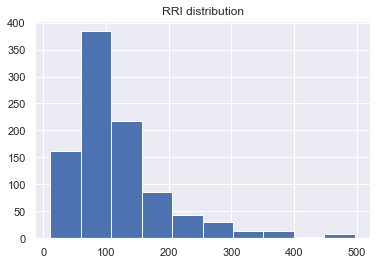

In [6]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [7]:
res_stoch.merge()
res_stoch.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_stoch.df_merged

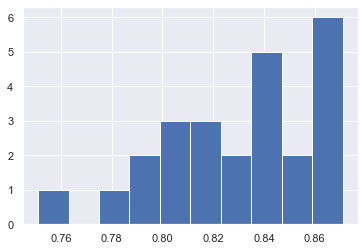

In [8]:
df.groupby('sim')['prepared'].mean().hist()
plt.show()

## Experiments
### Changes in returns

In [9]:
vars(res_deter.prices)

{'seed': 0,
 'inflation_rate': 0.02,
 'ret_equity_2018': -0.1041,
 'mu_equity': 0.0688,
 'rho_equity': 0.0,
 'sig_equity': 0.2179,
 'ret_dividends': 0.0417,
 'ret_bills_2018': -0.0029,
 'mu_bills': 0.0103,
 'rho_bills': 0.5756,
 'sig_bills': 0.06,
 'ret_bonds_2018': 0.0062,
 'mu_bonds': 0.0253,
 'rho_bonds': 0.3219,
 'sig_bonds': 0.1069,
 'ret_housing_2018': 0.0004,
 'mu_housing': 0.0161,
 'rho_housing': 0.21,
 'sig_housing': 0.0987,
 'price_rent_2018': 20.0,
 'mu_price_rent': 15.0,
 'rho_price_rent': 0.95,
 'sig_price_rent': 4.0,
 'corr_housing_price_rent': 0.6,
 'ret_business_2018': -0.1041,
 'mu_business': 0.0688,
 'rho_business': 0.0,
 'sig_business': 0.2179,
 'gr_rate_wage': 0.01,
 'rho_wage': 0.96235919,
 'sig_pers_wage': 0.050739054,
 'sig_trans_wage': 0.018554826,
 'adj_fact_annuities': 0.9,
 'ret_dividends_tsx': 0.028,
 'ret_bills': array([[0.017042  ],
        [0.02317441],
        [0.02672097],
        [0.02876795],
        [0.02994804],
        [0.03062791],
        [0.0310

In [14]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1983.0,male,65.0,post-secondary,80000.0,NaN,203255.813953,11962.025316,NaN,240000.000000,0.000000,0.000000,NaN,0.000000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1957.0,female,75.0,post-secondary,69000.0,NaN,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,45000.0,0.04,0.04,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN,7200.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,600.0,250.0,NaN,NaN,NaN,65.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
1,1971.0,female,65.0,high school,50000.0,NaN,900.000000,NaN,NaN,2400.000000,0.000000,NaN,NaN,0.070157,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,445000.0,NaN,445000.0,NaN,NaN,NaN,0.000000,1.00000,0.000000,0.008333,0.000000,NaN,NaN,NaN,NaN,NaN,212000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
2,1956.0,female,65.0,post-secondary,65000.0,NaN,NaN,18750.000000,NaN,500.000000,NaN,0.039062,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,NaN,NaN,NaN,NaN,NaN,NaN,0.999550,0.00045,0.000000,0.019996,0.000000,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,60.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
3,1966.0,female,60.0,post-secondary,55000.0,NaN,26250.000000,NaN,NaN,26470.588235,0.000000,NaN,NaN,0.058824,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,male,75.0,post-secondary,30000.0,NaN,NaN,94137.931034,NaN,105882.352941,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,665000.0,NaN,665000.0,NaN,NaN,NaN,0.689498,0.02968,0.280822,0.018733,0.005240,NaN,52000.0,NaN,NaN,NaN,335000.0,NaN,NaN,NaN,800.0,NaN,NaN,NaN,1706.0,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
4,1966.0,female,58.0,post-secondary,90000.0,NaN,4271.186441,2706.766917,1846.153846,NaN,0.012712,0.007519,0.0,NaN,0.0,0.0,0.0,NaN,0.5,0.05,NaN,5000.0,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,130000.0,NaN,130000.0,NaN,0.0,0.0,0.367816,0.08046,0.551724,0.014598,0.008276,NaN,NaN,NaN,5500.0,NaN,78000.0,NaN,NaN,NaN,NaN,NaN,500.0,NaN,400.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


In [15]:
factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                                     multiprocessing=True,
                                     mu_equity=factor * 0.0688,
                                     mu_bills=factor * 0.0103,
                                     mu_bonds=factor * 0.0253)
    res.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
    l_prepared.append(res.df_merged.prepared.mean())    


total time: 17.45180892944336

total time: 19.04400634765625

total time: 22.47339177131653

total time: 21.98448872566223

total time: 22.76475739479065

total time: 24.61437439918518

total time: 23.195160388946533

total time: 19.967886924743652

total time: 18.723164558410645

total time: 19.954838752746582


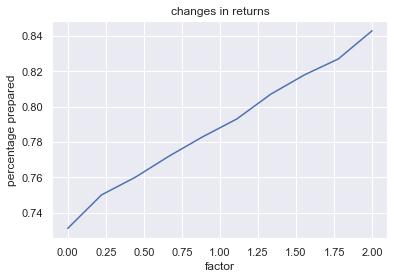

In [16]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

### Selling first residence

In [12]:
vars(res_deter.common)

{'nsim': 1,
 'non_stochastic': True,
 'base_year': 2018,
 'db_penalty_early_ret': 0.05,
 'rrsp_limit_2018': 26230.0,
 'rrsp_limit_2019': 26500.0,
 'rrsp_limit_2020': 27230.0,
 'rrsp_limit_2021': 27830.0,
 'gr_rrsp_limit': 0.03,
 'tfsa_limit_2018': 5500.0,
 'tfsa_limit_2019': 6000.0,
 'tfsa_limit_2020': 6000.0,
 'gr_tfsa_limit': 0.02,
 'gr_ympe': 0.03,
 'perc_cpp_2018': 0.25,
 'perc_cpp_2019': 0.262,
 'perc_cpp_2020': 0.274,
 'perc_cpp_2021': 0.29,
 'perc_cpp_2022': 0.31,
 'perc_cpp_2023': 0.33,
 'future_years': 110,
 'official_ret_age': 65,
 'min_age_cpp': 18,
 'max_ret_age': 75,
 'min_claim_age_cpp': 60,
 'max_claim_age_cpp': 70,
 'max_term_debts': 30,
 'age_cons_bef_ret': 55,
 'past_years': 50,
 'max_years_db': 35,
 'fee_rpp': 0.015,
 'max_age_no_rrif': 71,
 'frac_cap_gains': 0.5,
 'mix_bills_rpp': 0.0,
 'mix_bonds_rpp': 0.4,
 'mix_equity_rpp': 0.6,
 'perc_year_db': 0.02,
 'n_best_wages_db': 5,
 'db_offset': 600.0,
 'db_benefit_multiplier': 9.0,
 'db_minimum_age': 55,
 'db_ret_age_no

In [13]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       multiprocessing=True,
                                       sell_first_resid=False)
res_not_selling.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_not_selling.df_merged

print(f'percentage people prepared without selling house: {df.prepared.mean() * 100}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   multiprocessing=True,
                                   sell_first_resid=True)
res_selling.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_selling.df_merged

print(f'percentage people prepared when selling house: {df.prepared.mean() * 100}%')


total time: 18.940204620361328
percentage people prepared without selling house: 78.7%

total time: 18.785950899124146
percentage people prepared when selling house: 79.4%


# Using CPR with other inputs

In [7]:
# saving copy of dataframe
inputs.to_csv('my_inputs.csv')

In [10]:
my_inputs = pd.read_csv('my_inputs.csv', index_col=0)

In [11]:
my_inputs

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1978,male,65,university,80000,NaN,150000,70000,NaN,5000,0.18,0.07,NaN,0.06,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,NaN,0,NaN,0,NaN,0,0,NaN,NaN


In [27]:
my_res = main.run_simulations(my_inputs, 500, non_stochastic=False,
                              multiprocessing=True)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)


total time: 10.907058954238892


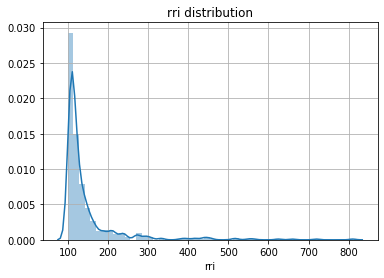

In [35]:
ax = sns.distplot(df.rri)
ax.grid()
ax.set_title('rri distribution')
plt.show()